# <center> ML Assignment3 Image Sentiment Classification
supervised learning, classification

### training data:
grayscale image with size of 48 * 48, 0 means black, 255 means white

label: 0 ~ 6

### input: 
vector with 48 * 48 dimension
### output: 
label

### specification:
question: Report.docx

training data: train.csv

test data: test.csv

sample code: predicted_output.py

baseline:

table | public | private
--- | --- | ---
strong baseline | 0.67957 | 0.66815
simple baseline | 0.62468 | 0.61632


more: https://www.kaggle.com/c/ml2019spring-hw3/overview



### myresult:
I use the best model in http://cs231n.stanford.edu/reports/2016/pdfs/005_Report.pdf

public: 0.63778

private: 0.62970

# <center> questions in report

### Question 1:

#### CNN model:

Architecture: 

I construct four CNN layers and each layer has same strcuture which is Conv2d, BN, activation, Maxpooling, Dropout.

The first convolution layer has 64 3 * 3 filters, the second has 128 5 * 5 filters, the third one and last one both have 512 3 * 3 fitlers. They all use relu as activation function and max_pool size with 2 * 2.

The hyper-paramters are showing below.

learning-rate: default in keras

Dropout: 0.2

Then CNN layers are connected to two DNN layers. Each layer uses same structure which is Dense, BN, activation, Dropout.

The first layer has 256 nuerons nad second layer has 512 nuerons. They both use relu as activation function and L2 regularization.

The hyper-parameters are showing below.

leraning-rate: default in keras

Dropout: 0.2

regular: 1e-7

Finally, the DNN layers are connet to softmax outout layer.

I use adam as optimizer and crossentropy as loss function.

results:

public: 0.63778

private: 0.62970


## training process

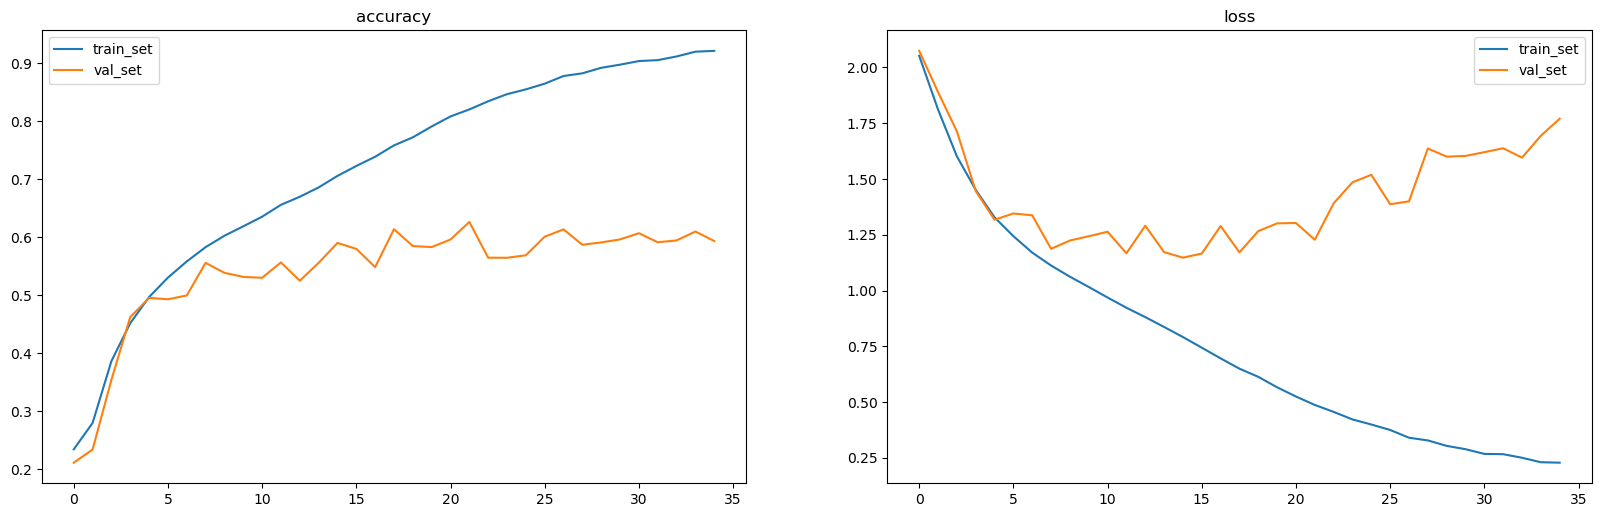

In [1]:
from IPython.display import Image 
training_process = Image('accuracy_loss.png')
display(training_process)

## confusion matrix

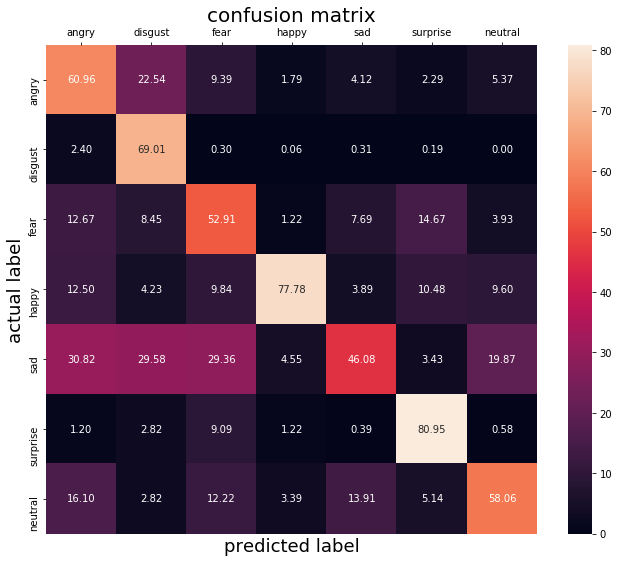

In [12]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

'''
confusion_matrix = Image('confusion_matrix.png')
display(confusion_matrix)
'''

cm = np.array([[356, 16, 63, 28, 53, 12, 56],
              [14, 49, 2, 1, 4, 1, 0],
              [74, 6, 355, 19, 99, 77, 41],
              [73, 3, 66, 1215, 50, 55, 100],
              [180, 21, 197, 71, 593, 18, 207],
              [7, 2, 61, 19, 5, 425, 6],
              [94, 2, 82, 53, 179, 27, 605]])

row_sum_cm = cm.sum(axis=1)
cm = cm/row_sum_cm * 100

label = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
df_cm = pd.DataFrame(cm, index=label, columns=label)

fig, ax = plt.subplots(figsize=(11, 9))
ax = sn.heatmap(df_cm, fmt='.2f', annot=True)
ax.set_title('confusion matrix', fontsize=20)
ax.set_xlabel('predicted label', fontsize=18)
ax.set_ylabel('actual label', fontsize=18)
ax.xaxis.set_ticks_position('top')
#plt.savefig('confusion_matrix', dpi=100, bbox_inches='tight')
plt.show()